In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

def img_change_chanels(img):
    return cv2.merge(cv2.split(img)[::-1])

def show(img):
    plt.imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def show_sub(images,x,y):
    for i in range(len(images)):
        plt.subplot(x,y,i+1)
        plt.imshow(images[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [2]:
cat = cv2.imread("./images/cat.3.jpg")
dog = cv2.imread("./images/dog.3.jpg")
cat = img_change_chanels(cat)
dog = img_change_chanels(dog)

In [3]:
img = img = cv2.imread("./images/fushi.1.png")
img = img_change_chanels(img)

In [5]:
# 二值化处理
def getBinImage(img,thres = 127,max_num = 255):
    indexs = np.mean(img,axis=2)
    chanel = np.copy(img[:,:,0])
    for i in range(len(indexs)):
        for j in range(len(indexs[0])):
            if indexs[i][j]<thres:
                chanel[i][j] = 0
            else:
                chanel[i][j] = max_num
    return cv2.merge([chanel,chanel,chanel])

In [6]:
img = getBinImage(img)

### 开运算 
#### 也就是先腐蚀，在膨胀

In [7]:
kernel = np.ones([5,5],dtype='uint8')

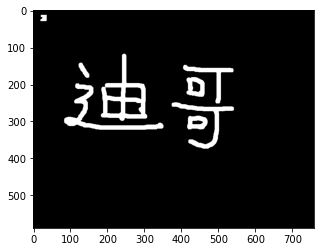

In [8]:
new_img = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
show(new_img)

### 闭运算
#### 与开运算顺序相反

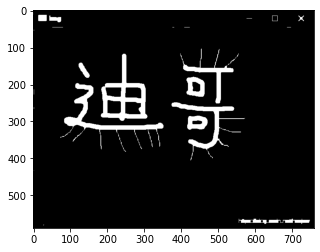

In [9]:
new_img_b = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
show(new_img_b)

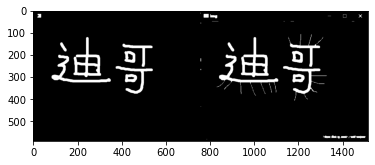

In [10]:
total = np.hstack([new_img,new_img_b])
show(total)